<a href="https://colab.research.google.com/github/IfrazQazi/Book-Recommendation-System/blob/main/Book_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BOOK RECOMMENDATION SYSTEM**
##**Problem Statement**
## During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
##In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
##Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## Content
## The Book-Crossing dataset comprises 3 files.
##● Users
##Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
## ● Books
## Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.
##● Ratings
##Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [1]:
#Importing libraries
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive with google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading data

In [3]:
## loading book data set
books = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Book Recommendation system/Books.csv')

In [4]:
## loading users data set
users = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Book Recommendation system/Users.csv')

In [5]:
## loading Ratings data set
rating = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Book Recommendation system/Ratings.csv')

## Lets check Book data set

In [6]:
books.shape

(271360, 8)

## books data set is having shape of 271360 observation 8 columns.

In [7]:
print("Columns: ", list(books.columns))
books.head()

Columns:  ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


## **Observation**
* we can see that ISBN is unique book number
* 242135 unique book Title 
* 102023 Book author 
* Year of publication  is having 202 unique years
* 16807 Publisher
* we can see that 3 columns belongs to image URL 
* Image URL S and Image URL M is having same number of unique URL but Image URL L is having less number of URL as compare to Image URL S and M

In [9]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [10]:
## Checking for null values
books.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [11]:
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [12]:
books.loc[books['Book-Title']==books.iloc[187689,1]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [13]:
books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [14]:
books.loc[books['Book-Title']==books.iloc[128890,1]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN


In [15]:
books.loc[books['Book-Title']==books.iloc[129037,1]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
134309,0156309505,Finders Keepers,Will,1989,Voyager Books
173473,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications
195885,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch
211874,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library


In [16]:
#Filling Nan of Book-Author with others
books['Book-Author'].fillna('other',inplace=True)

In [17]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [18]:
# checking null values
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [19]:
## Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

## We can see in the Year-Of-Publication column there is some string values in it. 
##So lets check it 

In [20]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [21]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


##As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file

In [22]:
#making required corrections as above, keeping other fields intact

books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [23]:
## Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [24]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [25]:
books['Year-Of-Publication'].describe()

count    271360.000000
mean       1959.761273
std         257.992836
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

## we can see the minimum year of publication is 0 and maximum is 2050 which is not possible

In [26]:
# lets check how many values of year of publication are greater than 2022 years
books.loc[books['Year-Of-Publication']>2022].count()

ISBN                   13
Book-Title             13
Book-Author            13
Year-Of-Publication    13
Publisher              13
dtype: int64

In [27]:
# lets check how many values of year of publication are equal to zero
books.loc[books['Year-Of-Publication']==0].count()

ISBN                   4618
Book-Title             4618
Book-Author            4618
Year-Of-Publication    4618
Publisher              4618
dtype: int64

##So, we can see that there are 13 values which are greater than 2022 and 4618 values which are equal to zero in year of publication column which we have to treat before moving ahead.

In [28]:
books['Year-Of-Publication'].mode()

0    2002
dtype: int64

In [29]:
# lets replace all values of year of publicaion which are greater than 2021 and equal to zero with maximum number of years
books.loc[(books['Year-Of-Publication'] > 2021) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = 2002


In [30]:
# now lets verify if there any value greater than 2022
books.loc[books['Year-Of-Publication']>2022].count()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [31]:
# similarly lets verfy if there and value equal to zero in year of publication column
books.loc[books['Year-Of-Publication']==0].count()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

## Now our Year Of Publication feature doesnt have any unnecessary values

In [32]:
books.duplicated().sum()

0

## books data set doesnt have any duplicate values

In [33]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


## **Visualization:**


## Top 10 publisher

In [34]:
# creating dataframe for top 10 publisher
order=pd.value_counts(books['Publisher']).iloc[:10].reset_index().rename(columns={'index':'Publisher','Publisher':'Count'}).sort_values(by='Count',ascending=True)

In [35]:
# bar graph of top 10 publisher
fig = px.histogram(x= order.Count,y=order.Publisher,orientation=None , width=650, height=450,
              text_auto=True,color=order.Publisher
             )
fig.update_layout(
    title='Top 10 Publishers',
    xaxis_title="Count",
    yaxis_title="Publisher",
    template="plotly_dark",
    
)
fig.show()

## From the graph above we can see the top 10 publishers and among them Harlequin publishers are the publishers of most books

## Top 10 Book Author

In [36]:
# creating dataframe for top 10 Author
author=pd.value_counts(books['Book-Author']).iloc[:10].reset_index().rename(columns={'index':'Author','Book-Author':'Count'}).sort_values(by='Count',ascending=True)

In [37]:
# bar graph of top 10 publisher
fig = px.histogram(x= author.Count,y=author.Author,orientation=None , width=650, height=450,
              text_auto=True,color=author.Author
             )
fig.update_layout(
    title='Top 10 Author',
    xaxis_title="Count",
    yaxis_title="Author",
    template="plotly_dark",
    
)
fig.show()

## From the graph above we can see the top 10 Author

In [38]:
year_book=books['Year-Of-Publication'].value_counts().reset_index().rename(columns={'index':'Year','Year-Of-Publication':'Count'}).sort_values(by='Year',ascending=False)


In [39]:
fig = go.Figure()
fig.add_trace(go.Bar(x=year_book.Year, y=year_book.Count,
                
                marker_color='crimson',
                name='expenses'))
fig.update_layout(
    
    width=1000, height=450,
    title='Number of book publish per year',
    xaxis_title="Year",
    yaxis_title="Number of Books",
    template="plotly_dark",
    
)
fig.show()

## From the above graph we can see that most of the books are published between 1980-2000

## Users Dataset Pre-processing

In [40]:
print("Columns: ", list(users.columns))
users.head()

Columns:  ['User-ID', 'Location', 'Age']


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [41]:
## Checking null values
print(users.isna().sum())   

User-ID          0
Location         0
Age         110762
dtype: int64


In [42]:
## Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [43]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


## We can see some invalid data in age column
## minimum age is 0 and Maximum is 244

## We assume that for reading a book age should be between 10-90

In [44]:
# mean of age between 10-90
users.loc[(users['Age']<=90)&(users['Age']>=10),['Age']].mean().round()

Age    35.0
dtype: float64

## Replacing outliers and filling Null values with mean

In [45]:
users.loc[users['Age'] > 90, 'Age'] = 35    #outliers with age grater than 90 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = 35    #outliers with age less than 10 years are substitued with mean
users['Age'] = users['Age'].fillna(35)      #filling null values with mean
users['Age'] = users['Age'].astype(int)       #changing Datatype to int

##Age Distribution

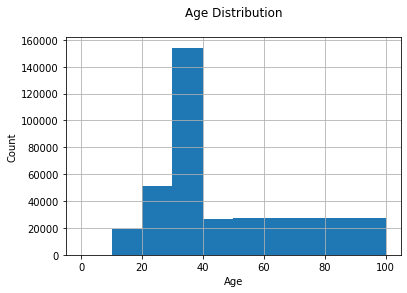

In [46]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Let's find our unique value in Location column

In [47]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [48]:
users.Location.nunique()

57339

In [49]:
## Extracting  city state and country from location column

list_ = users.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
users = users.drop('Location',axis=1)
temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4659
16044


In [50]:
users.head()

,User-ID,Age,City,State,Country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


In [51]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  int64 
 2   City     278858 non-null  object
 3   State    278858 non-null  object
 4   Country  278858 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.6+ MB


In [52]:
# checking duplicate values
users.duplicated().sum()

0

## users data set doesnt have any null values and duplicate values
## We succefully cleaned our Users data set so lets move forward

## **Visualization:**

In [53]:
# top 10 Country 
country_count=users['Country'].value_counts()[:10].reset_index().rename(columns={'index':'country','Country':'count'}).sort_values(by='count',ascending=False)

In [54]:
## top 10 country based on number of readers
fig = px.histogram(x= country_count['country'],y=country_count['count'],orientation=None , width=650, height=450,
              text_auto=True, color=country_count['country']
             )
fig.update_layout(
    title='Top 10 Country having highest number of reader',
    xaxis_title="country",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

## as we can see from above plot most of the readers are from USA

## Lets see Top 10 state of USA having highest number of readers

In [55]:
# top 10 State of USA
state_usa=users.loc[users['Country']=='usa',['State']].value_counts()[:10].reset_index().rename(columns={0:'count'})


In [56]:
## top 10  States of USA based on number of readers
fig = px.histogram(x= state_usa['State'],y=state_usa['count'],orientation=None , width=650, height=450,
              text_auto=True, color=state_usa['State']
             )
fig.update_layout(
    title='Top 10 States of USA having highest number of reader',
    xaxis_title="States",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

## From above plot we can see that in USA california is having highest number of readers

## lets see Top 10 city of California which is having highest number of readers

In [57]:
## Top 10 cities
cities=users.loc[(users['State']=='california'),['City']].value_counts()[:10].reset_index().rename(columns={0:'count'})

In [58]:
fig = px.histogram(x= cities['City'],y=cities['count'],orientation=None , width=650, height=450,
              text_auto=True, color=cities['City']
             )
fig.update_layout(
    title='Top 10 cities of USA having highest number of reader',
    xaxis_title="cities",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

## In USA San diego  is having highest number of reader followed by san francisco and Los Angeles

## lets see worldwide which is state is having highest number of readers


In [59]:
## top 10 States of world based on number of readers
top_10_states=users['State'].value_counts()[:10].reset_index().rename(columns={'index':'state','State':'count'})

In [63]:
# plot for top 10 state
fig = px.histogram(x= top_10_states['state'],y=top_10_states['count'],orientation=None , width=650, height=450,
              text_auto=True, color=top_10_states['state']
             )
fig.update_layout(
    title='Top 10 State in the World having highest number of reader',
    xaxis_title="States",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

## here we can see that California is stil having highest number of reader

## Lets see world wide which city is having highest number of reader

In [61]:
# top 10 cities of world based on number of readers
top_10_cities=users['City'].value_counts()[:10].reset_index().rename(columns={'index':'city','City':'count'})

In [64]:
# plot for top 10 Cities
fig = px.histogram(x= top_10_cities['city'],y=top_10_cities['count'],orientation=None , width=650, height=450,
              text_auto=True, color=top_10_cities['city']
             )
fig.update_layout(
    title='Top 10 Cities in the World having highest number of reader',
    xaxis_title="Cities",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

## Here we can see that unlike cities in the United States, we have the largest number of readers here in London, followed by Barcelona.